### **spacy_text_classification : Exercise**


- In this exercise, you are going to classify whether a given text belongs to one of possible classes ['BUSINESS', 'SPORTS', 'CRIME'].

- you are going to use spacy for pre-processing the text, convert text to numbers and apply different classification algorithms.

In [1]:
#uncomment the below line and run this cell to install the large english model which is trained on wikipedia data

# !python -m spacy download en_core_web_lg

In [1]:
#import spacy and load the language model downloaded
import spacy

nlp = spacy.load('en_core_web_lg')

### **About Data: News Category Classifier**

Credits: https://www.kaggle.com/code/hengzheng/news-category-classifier-val-acc-0-65


- This data consists of two columns.
        - Text
        - Category
- Text are the description about a particular topic.
- Category determine which class the text belongs to.
- we have classes mainly of 'BUSINESS', 'SPORTS', 'CRIME' and comes under **Multi-class** classification Problem.

In [3]:
#import pandas library
import pandas as pd


#read the dataset "news_dataset.json" provided and load it into dataframe "df"

df = pd.read_json('news_dataset.json')

#print the shape of data
print(df.shape)

#print the top5 rows
df.head()


(7500, 2)


,text,category
0,"Larry Nassar Blames His Victims, Says He 'Was ...",CRIME
1,"Woman Beats Cancer, Dies Falling From Horse",CRIME
2,Vegas Taxpayers Could Spend A Record $750 Mill...,SPORTS
3,This Richard Sherman Interception Literally Sh...,SPORTS
4,7 Things That Could Totally Kill Weed Legaliza...,BUSINESS


In [4]:
#check the distribution of labels 
df.category.value_counts()


category
CRIME       2500
SPORTS      2500
BUSINESS    2500
Name: count, dtype: int64

In [6]:
#Add the new column "label_num" which gives a unique number to each of these labels 
df['label_num'] = df['category'].map(
    {
        'CRIME':0,
        'SPORTS':1,
        'BUSINESS':2
    }
)


#check the results with top 5 rows
df.head()

,text,category,label_num
0,"Larry Nassar Blames His Victims, Says He 'Was ...",CRIME,0
1,"Woman Beats Cancer, Dies Falling From Horse",CRIME,0
2,Vegas Taxpayers Could Spend A Record $750 Mill...,SPORTS,1
3,This Richard Sherman Interception Literally Sh...,SPORTS,1
4,7 Things That Could Totally Kill Weed Legaliza...,BUSINESS,2


### **Preprocess the text**

In [7]:
#use this utility function to preprocess the text
#1. Remove the stop words
#2. Convert to base form using lemmatisation

def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    return ' '.join(filtered_tokens)

In [8]:
#create a new column "preprocessed_text" which store the clean form of given text [use apply and lambda function]
df['preprossed_text'] = df['text'].apply(preprocess)


In [5]:
#print the top 5 rows
df.head()

### **Get the spacy embeddings for each preprocessed text**

In [9]:
#create a new column "vector" that store the vector representation of each pre-processed text

df['vector'] = df['preprossed_text'].apply(lambda x: nlp(x).vector)

In [10]:
#print the top 5 rows
df.head()

,text,category,label_num,preprossed_text,vector
0,"Larry Nassar Blames His Victims, Says He 'Was ...",CRIME,0,Larry Nassar blame Victims say victimize newly...,"[-0.3472573, 0.021758832, -0.2137525, -0.01718..."
1,"Woman Beats Cancer, Dies Falling From Horse",CRIME,0,woman Beats Cancer dies fall Horse,"[-0.16791849, 0.43708333, 0.035527337, 0.01661..."
2,Vegas Taxpayers Could Spend A Record $750 Mill...,SPORTS,1,Vegas Taxpayers spend record $ 750 million New...,"[0.053351898, 0.08053064, -0.05101806, -0.1991..."
3,This Richard Sherman Interception Literally Sh...,SPORTS,1,Richard Sherman Interception literally shake W...,"[-0.038867258, 0.28459162, 0.071352966, -0.045..."
4,7 Things That Could Totally Kill Weed Legaliza...,BUSINESS,2,7 thing totally kill weed legalization Buzz,"[-0.20180944, 0.11867001, 0.0036708585, -0.189..."


**Train-Test splitting**

In [12]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.vector.values,  #->
    df.label_num,
    test_size=0.2,
    random_state=2022
)


**Reshape the X_train and X_test so as to fit for models**

In [13]:
# import numpy as np

import numpy as np

#reshapes the X_train and X_test using 'stack' function of numpy. Store the result in new variables "X_train_2d" and "X_test_2d"

X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)

**Attempt 1:**


- use spacy glove embeddings for text vectorization.

- use Decision Tree as the classifier.

- print the classification report.

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

#1. creating a Decision Tree model object
dt = DecisionTreeClassifier()


#2. fit with all_train_embeddings and y_train
dt.fit(X_train_2d,y_train)


#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = dt.predict(X_test_2d)


#4. print the classfication report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       486
           1       0.74      0.77      0.76       479
           2       0.79      0.75      0.77       535

    accuracy                           0.77      1500
   macro avg       0.77      0.77      0.77      1500
weighted avg       0.77      0.77      0.77      1500



**Attempt 2:**


- use spacy glove embeddings for text vectorization.
- use MultinomialNB as the classifier after applying the MinMaxscaler.
- print the classification report.

In [18]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report



#doing scaling because Negative values will not pass into Naive Bayes models
scaler = MinMaxScaler()


#1. creating a MultinomialNB model object 
nb = MultinomialNB()


#2. fit with all_train_embeddings(scaled) and y_train
X_train_scaled = scaler.fit_transform(X_train_2d)
X_test_scaled = scaler.transform(X_test_2d)

nb.fit(X_train_scaled,y_train)

#3. get the predictions for all_test_embeddings and store it in y_pred

y_pred = nb.predict(X_test_scaled)

#4. print the classfication report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89       486
           1       0.89      0.88      0.89       479
           2       0.88      0.88      0.88       535

    accuracy                           0.89      1500
   macro avg       0.89      0.89      0.89      1500
weighted avg       0.89      0.89      0.89      1500



**Attempt 3:**


- use spacy glove embeddings for text vectorization.
- use KNeighborsClassifier as the classifier after applying the MinMaxscaler.
- print the classification report.

In [19]:
from  sklearn.neighbors import KNeighborsClassifier


#1. creating a KNN model object
knn = KNeighborsClassifier()


#2. fit with all_train_embeddings and y_train

knn.fit(X_train_scaled,y_train)

#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = knn.predict(X_test_scaled)


#4. print the classfication report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       486
           1       0.95      0.86      0.90       479
           2       0.90      0.89      0.90       535

    accuracy                           0.90      1500
   macro avg       0.90      0.90      0.90      1500
weighted avg       0.90      0.90      0.90      1500



**Attempt 4:**


- use spacy glove embeddings for text vectorization.
- use RandomForestClassifier as the classifier after applying the MinMaxscaler.
- print the classification report.

In [20]:
from sklearn.ensemble import RandomForestClassifier


#1. creating a Random Forest model object

rf =RandomForestClassifier()

rf.fit(X_train_scaled,y_train)

#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = rf.predict(X_test_scaled)


#4. print the classfication report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       486
           1       0.88      0.91      0.89       479
           2       0.91      0.87      0.89       535

    accuracy                           0.89      1500
   macro avg       0.89      0.89      0.89      1500
weighted avg       0.89      0.89      0.89      1500



**Attempt 5:**


- use spacy glove embeddings for text vectorization.
- use GradientBoostingClassifier as the classifier after applying the MinMaxscaler.
- print the classification report.

In [21]:
from sklearn.ensemble import GradientBoostingClassifier


#1. creating a GradientBoosting model object
gb = GradientBoostingClassifier()


gb.fit(X_train_scaled,y_train)

#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = gb.predict(X_test_scaled)


#4. print the classfication report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       486
           1       0.90      0.92      0.91       479
           2       0.91      0.90      0.90       535

    accuracy                           0.90      1500
   macro avg       0.90      0.90      0.90      1500
weighted avg       0.90      0.90      0.90      1500



**Print the confusion Matrix with the best model got**

Text(95.72222222222221, 0.5, 'Truth')

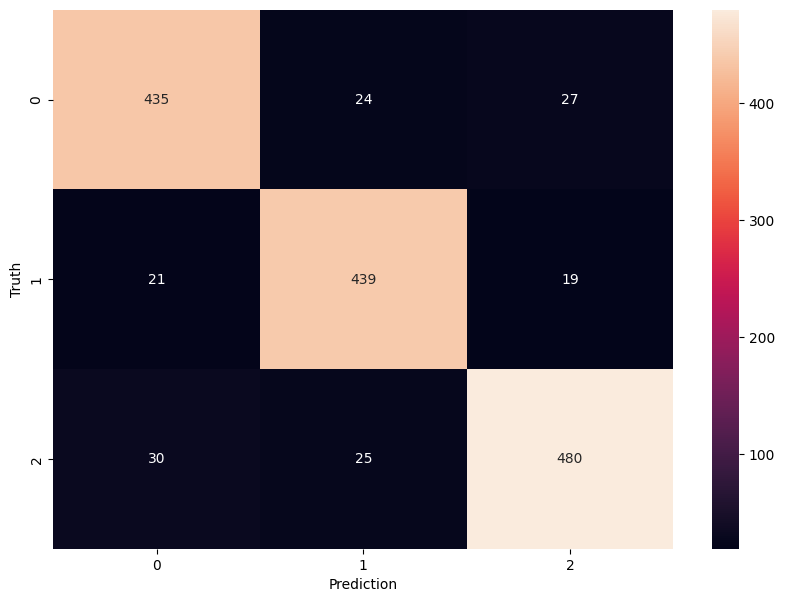

In [23]:
#finally print the confusion matrix for the best model: GradientBoostingClassifier

# from sklearn.metrics import confusion_matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

